In [17]:
import json
import os
import numpy as np
from utils import utils

def get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas):

    pcks = np.zeros(len(pck_sigmas))
    for image_name in pred_label_dict.keys():
        pred_label = pred_label_dict[image_name]['pred_label']
        pred_resol = pred_label_dict[image_name]['resol']
        gdtt_label = gdtt_all_label_dict[image_name]
        for sigma_id in range(len(pck_sigmas)):
            sigma = pck_sigmas[sigma_id]
            pck = utils.PCK(pred_label, gdtt_label, pred_resol, sigma=sigma)
            pcks[sigma_id]= pcks[sigma_id] + pck
    ave_pcks = pcks/len(pred_label_dict)
    return ave_pcks


pck_sigmas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16]
# get gdtt labels
gdtt_label_file = '../data/external/cmu_panoptic_hands/intermediate_1/labels.json'
with open(gdtt_label_file, 'r') as f:
    gdtt_all_label_dict = json.load(f)
# get pred_labels
pred_label_file = '../checkpoint/OpenPoseHand/04-03-17-22-22/valid_pred_labels/epoch_057.json'
with open(pred_label_file, 'r') as f:
    pred_label_dict = json.load(f)
pcks_1 = get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas)
print(pcks_1)


pred_label_file = '../checkpoint/OpenPoseHand/04-03-17-22-22/valid_gm_pred_labels/gdtt_gm_labels.json'
with open(pred_label_file, 'r') as f:
    pred_label_dict = json.load(f)
pcks_2 = get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas)
print(pcks_2)

pred_label_file = '../checkpoint/PredGMOpenPose/04-10-11-18-26/valid_gm_pred_labels/pred_gm_labels.json'
with open(pred_label_file, 'r') as f:
    pred_label_dict = json.load(f)
pcks_3 = get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas)
print(pcks_3)

[0.23719555 0.57464173 0.72357175 0.79226913 0.83108412 0.85839599
 0.87825333 0.89460832 0.90996723 0.92057066 0.92943898 0.93766467
 0.9447015  0.95112782 0.95684725 0.96096009]
[0.28773858 0.66997622 0.81623932 0.8794422  0.91549386 0.94081357
 0.95800398 0.96947497 0.97760427 0.98309877 0.98772572 0.99167791
 0.99399139 0.99559797 0.99688323 0.99762226]
[0.22794165 0.56567701 0.72999807 0.81061628 0.85351199 0.88355504
 0.90553306 0.91983163 0.93294133 0.94213097 0.95067798 0.95704004
 0.96230962 0.96664739 0.971435   0.97484095]


In [18]:
for i in range(len(pcks_3)):
    print(pcks_3[i] - pcks_1[i])

-0.009253903990746742
-0.008964719491035722
0.006426322215796532
0.018347149926097095
0.022427864533126174
0.02515905147484032
0.027279737806052196
0.025223314696997234
0.02297410192146887
0.021560311033993917
0.021238994923203802
0.019375361480622688
0.017608122871278775
0.015519568151145191
0.0145877514298548
0.013880855986117324


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Performance on validation dataset from CMU panoptic data')

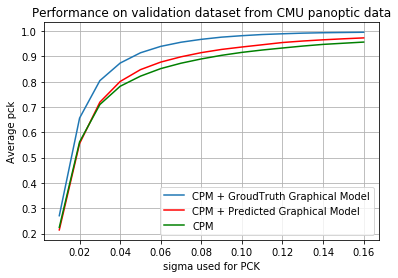

In [36]:
plt.plot(pck_sigmas, pcks_2)
plt.plot(pck_sigmas, pcks_3, 'r')
plt.plot(pck_sigmas, pcks_1, 'g')

plt.grid()
plt.xlabel('sigma used for PCK')
plt.ylabel('Average pck')
plt.legend(('CPM + GroudTruth Graphical Model','CPM + Predicted Graphical Model','CPM'))
plt.title('Performance on validation dataset from CMU panoptic data')

In [25]:
# get pred_labels
pred_label_file = '../checkpoint/PredGMOpenPose/04-10-11-33-43/test_cpm_pred_labels/pred_cpm_labels.json'
with open(pred_label_file, 'r') as f:
    pred_label_dict = json.load(f)
pcks_1 = get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas)
print(pcks_1)

pred_label_file = '../checkpoint/OpenPoseHand/04-03-17-22-22/test_gm_pred_labels/gdtt_gm_labels.json'
with open(pred_label_file, 'r') as f:
    pred_label_dict = json.load(f)
pcks_2 = get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas)
print(pcks_2)

pred_label_file = '../checkpoint/PredGMOpenPose/04-10-11-33-43/test_gm_pred_labels/pred_gm_labels.json'
with open(pred_label_file, 'r') as f:
    pred_label_dict = json.load(f)
pcks_3 = get_pck_line(gdtt_label_file, pred_label_file, pck_sigmas)
print(pcks_3)

[0.22434291 0.56204614 0.70981942 0.78192276 0.82186235 0.85171261
 0.873048   0.88998136 0.90421567 0.91581518 0.92513335 0.93310199
 0.94081357 0.94736842 0.95196324 0.9564938 ]
[0.27041964 0.65622389 0.80415783 0.87359424 0.91417647 0.93956044
 0.95594756 0.96735428 0.97602982 0.98174924 0.98634407 0.98933231
 0.99183857 0.99344515 0.99444123 0.99537305]
[0.21425358 0.5553949  0.71904119 0.80084827 0.84759977 0.8774179
 0.89833558 0.9148191  0.92747895 0.93705417 0.94585824 0.95475869
 0.96070304 0.96545852 0.96944284 0.97304158]


In [29]:
for i in range(len(pcks_3)):
    print(pcks_3[i] - pcks_1[i])

-0.010089325878800098
-0.00665124349334878
0.009221772379666704
0.01892551892551919
0.025737420474262307
0.025705288863182574
0.02528757791915459
0.024837735364048985
0.02326328642117892
0.021238994923203247
0.02072488914593984
0.021656705867229786
0.019889467257885762
0.018090097037463226
0.01747959642696273
0.01654777970567267


Text(0.5, 1.0, 'Performance on test dataset from CMU panoptic data')

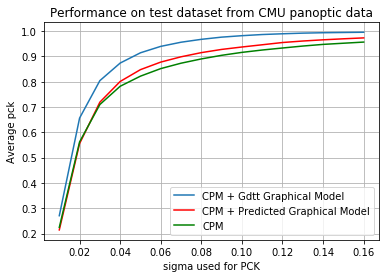

In [35]:
plt.plot(pck_sigmas, pcks_2)
plt.plot(pck_sigmas, pcks_3, 'r')
plt.plot(pck_sigmas, pcks_1, 'g')

plt.grid()
plt.xlabel('sigma used for PCK')
plt.ylabel('Average pck')
plt.legend(('CPM + Gdtt Graphical Model','CPM + Predicted Graphical Model','CPM'))
plt.title('Performance on test dataset from CMU panoptic data')